# Diabetes Prediction using Decission Tree Regressor

In [5]:
from sklearn.datasets import load_diabetes
import pandas as pd
dataset = load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
dataset['target']

# target is numerical values ----> regression dataset

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
# create dataframe 

df_diabetes = pd.DataFrame(dataset.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4','s5', 's6'])

# independent features 
X = df_diabetes
y = dataset['target']

In [9]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [10]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
# train test split 
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.159513,0.180804,0.324133,0.262160,0.199716,-0.023058,0.165480,0.266254,0.266706
sex,0.159513,1.000000,0.045831,0.180247,0.017967,0.110442,-0.338820,0.308991,0.105984,0.159663
bmi,0.180804,0.045831,1.000000,0.375038,0.255045,0.257140,-0.360168,0.428866,0.450936,0.389013
bp,0.324133,0.180247,0.375038,1.000000,0.242522,0.161199,-0.107979,0.208703,0.365678,0.375972
s1,0.262160,0.017967,0.255045,0.242522,1.000000,0.892852,0.042951,0.555728,0.520963,0.308419
s2,0.199716,0.110442,0.257140,0.161199,0.892852,1.000000,-0.194325,0.656085,0.298622,0.272405
s3,-0.023058,-0.338820,-0.360168,-0.107979,0.042951,-0.194325,1.000000,-0.735179,-0.379108,-0.283662
s4,0.165480,0.308991,0.428866,0.208703,0.555728,0.656085,-0.735179,1.000000,0.615701,0.419010
s5,0.266254,0.105984,0.450936,0.365678,0.520963,0.298622,-0.379108,0.615701,1.000000,0.456972
s6,0.266706,0.159663,0.389013,0.375972,0.308419,0.272405,-0.283662,0.419010,0.456972,1.000000


<Axes: >

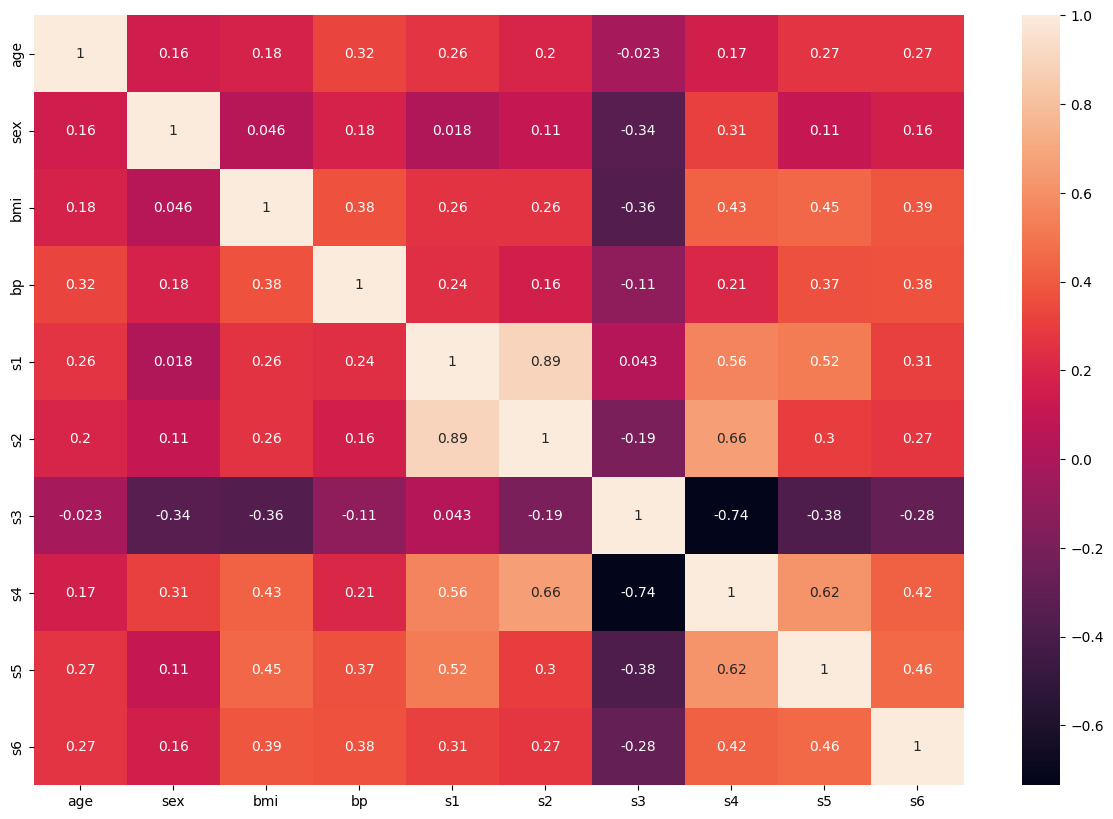

In [13]:
# plot co-reltion using hetmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [14]:
# apply decission tree regressor algo on the model

from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# Hyperparamter Tuning

In [18]:
params_list = {
    'criterion':['poisson', 'absolute_error', 'friedman_mse', 'squared_error'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5, 10, 15,20,25],
    'max_features':['auto', 'sqrt', 'log2']
}

params_list

{'criterion': ['poisson', 'absolute_error', 'friedman_mse', 'squared_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [19]:
# hyperparamter tune using gridsearchCv

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_regressor, param_grid=params_list, cv = 5 , scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 436, in _validate_params
   

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['poisson', 'absolute_error',
                                       'friedman_mse', 'squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [20]:
y_pred = grid.predict(X_test)

In [21]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.46259430309297955
2971.686799523322
43.386193560077636


In [23]:
selected_model = DecisionTreeRegressor(criterion= 'friedman_mse',
 max_depth= 3,
 max_features= 'sqrt',
 splitter= 'best')

selected_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt')

[Text(0.5, 0.875, 'x[2] <= 0.005\nfriedman_mse = 6044.625\nsamples = 331\nvalue = 154.344'),
 Text(0.25, 0.625, 'x[8] <= 0.006\nfriedman_mse = 3735.274\nsamples = 197\nvalue = 119.787'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 0.027\nfriedman_mse = 2507.936\nsamples = 140\nvalue = 101.514'),
 Text(0.0625, 0.125, 'friedman_mse = 2081.202\nsamples = 123\nvalue = 97.033'),
 Text(0.1875, 0.125, 'friedman_mse = 4398.644\nsamples = 17\nvalue = 133.941'),
 Text(0.375, 0.375, 'x[0] <= 0.065\nfriedman_mse = 3915.52\nsamples = 57\nvalue = 164.667'),
 Text(0.3125, 0.125, 'friedman_mse = 3653.273\nsamples = 53\nvalue = 158.83'),
 Text(0.4375, 0.125, 'friedman_mse = 958.5\nsamples = 4\nvalue = 242.0'),
 Text(0.75, 0.625, 'x[9] <= 0.034\nfriedman_mse = 5102.888\nsamples = 134\nvalue = 205.149'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= -0.075\nfriedman_mse = 4715.231\nsamples = 88\nvalue = 186.705'),
 Text(0.5625, 0.125, 'friedman_mse = 1681.0\nsamples = 2\nvalu

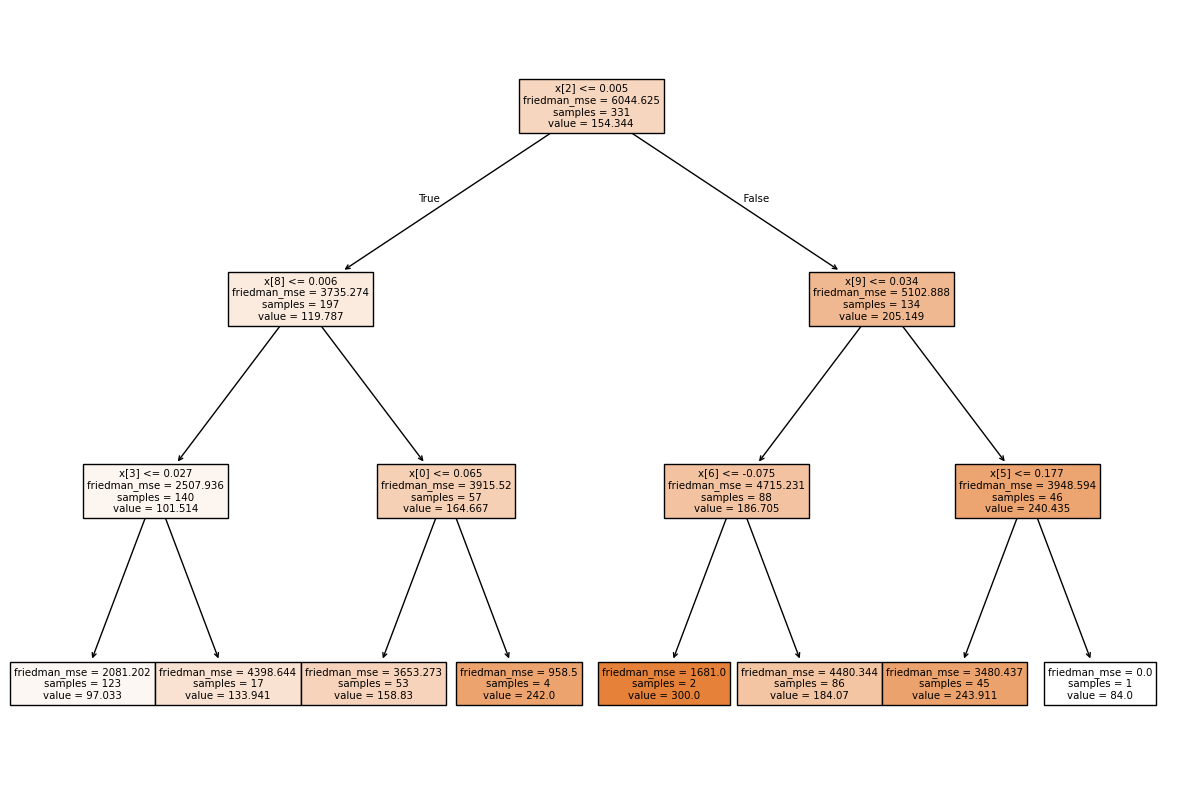

In [24]:
# plot the treee
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(selected_model, filled=True)